In [1]:
#!pip freeze 
!pip install -r requirements.txt
import numpy as np
import matplotlib.pyplot as plt 
#!pip install -U ipykernel

ERROR: Could not find a version that satisfies the requirement quadprog-wheel==0.1.11 (from versions: none)
ERROR: No matching distribution found for quadprog-wheel==0.1.11


  Using cached appmode-0.8.0-py3-none-any.whl
  Using cached ipywidgets-8.0.3-py3-none-any.whl (137 kB)
  Using cached k3d-2.14.5-py2.py3-none-any.whl (15.1 MB)
  Using cached ipympl-0.9.2-py2.py3-none-any.whl (510 kB)
  Using cached ipytree-0.2.2-py2.py3-none-any.whl (1.3 MB)
  Using cached importlib_resources-5.10.1-py3-none-any.whl (34 kB)
  Using cached traitsui-7.1.0-py3-none-any.whl
  Using cached selenium-4.7.2-py3-none-any.whl (6.3 MB)
  Using cached bs4-0.0.1-py3-none-any.whl
     ---------------------------------------- 3.8/3.8 MB 15.9 MB/s eta 0:00:00
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
  Using cached census-0.8.19-py3-none-any.whl (11 kB)
  Using cached notebook-6.5.2-py3-none-any.whl (439 kB)
  Using cached flake8-2.6.0-py2.py3-none-any.whl (38 kB)
  Using cached tox-2.3.1-py2.py3-none-any.whl (40 kB)
  Using cached Sphinx-1.4.8-py2.py3-none-any.whl (1.6 MB)
  Using cached cryptography-1.7.tar.gz

NameError: name 'np' is not defined

In [2]:
split=True
n_dim = 2 #number of dims in domain 
n_mp = 360 #number of microplanes in interpolation 
n_steps = 1000 #solver steps 
#ratio=step of defining actual domain
delta = np.identity(n_dim) #Kronecker δij
epsilon_11=np.linspace(0,0.01,n_steps)#define evenly the lin space from 0 to 0.01 with n_steps is the n in  nijk
#0.01 optional or otherwise raises DeprecationWarning when num cannot be safely interpreted as an integer
epsilon_ij=np.zeros((len(epsilon_11,),n_dim,n_dim))#creation of the finite 2d space
#question one-> since we use the ntr transormation and the space is also 2d there is no need for 3d?
#epsilon_ijk=np.zeros((len(epsilon_11,),n_dim,n_dim,n_dim))
epsilon_ij[:,0,0]=epsilon_11 #reshape,arrange,apprehend 
#epsilon_ij[:,0,0,0]=epsilon_11 for 3d
epsilon_ijcalc=epsilon_ij[0,:,:]#slicing for the calculations in the loops 


In [4]:
class IntegScheme():
    #n_mp=360
    alpha_list = np.linspace(0,2*np.pi,n_mp)#polar angle dom
    a_length=alpha_list.size 
    MPN = np.array([[np.cos(alpha),np.sin(alpha)] for alpha in alpha_list ])
    #alpha=float val?
    #weights of each microplane
    if n_dim==2:
        MPW = np.ones(n_mp) / n_mp * 2 
    elif n_dim==3:
        MPW = np.ones(n_mp) / n_mp * 6
    else: 
        print("ENTER NUMBER OF DIMS")
    MPM = np.zeros_like(MPN)
    delta= np.identity(n_dim) #should be already set?
    MPNN_nij = np.einsum('ni,nj -> nij', MPN,MPN)
    MPTT_nijr = 0.5*(np.einsum('ni,jr -> nijr',MPN,delta)
                    +np.einsum('nj,ir ->njir',MPN,delta)
                    -2*np.einsum('ni,nj,nr ->nijr',MPN,MPN,MPN))
    NPM=np.zeros_like(MPN)
    #attempt to create MPTM and MPTL instead ij sumbfor card coords
    lengthm=0.0
    #while lengthm==0 :# DO WHILE (lengthm .lt. epsilon(lengthm)
    ##calcdummy=MPN.shape
    #    randomvec=np.ones((a_length,n_dim))#since its just for the 3d ?
   #     MPTM_nijm=randomvec-np.einsum('niMPN,randomvec)*MPN
   #     lengthm=np.sqrt(MPTM_nij,MPTM_nij)
   # MPTM_nij=MPTM_nijm/lengthm
   # MPTL_ij=np.cross(MPTM_nij,MPNN_nij)
    #MPTM= np.einsum('nij,)
    #MPTL=MPNN_nij-MPNV

In [6]:
#for the creation of m&l we need a 3dlinspace apriori with set e1 to get the projection ?
#normal strain vector for each microplane
if split==True :
    e_N = np.einsum('nij,...ij->...n',IntegScheme.MPNN_nij,epsilon_ij)
    MPTT_ijr =  IntegScheme.MPTT_nijr 
    e_V_norm = np.einsum('...ij,...ij->...',delta, epsilon_ij)/3
    e_V = np.einsum('ij,i->ij', np.ones_like(e_N), e_V_norm)
    e_D = e_N - e_V
    MPN = IntegScheme.MPN
    e_T_r=np.einsum('nija,...ij->...na',MPTT_ijr,epsilon_ij)
else :
    e_N = np.einsum('nij,...ij->...n',IntegScheme.MPNN_nij,epsilon_ij)
    MPTT_ijr =  IntegScheme.MPTT_nijr 
    e_T_r=np.einsum('nija,...ij->...na',MPTT_ijr,epsilon_ij)

C:\Users\Rob\AppData\Local\Temp\ipykernel_7328\3789291480.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


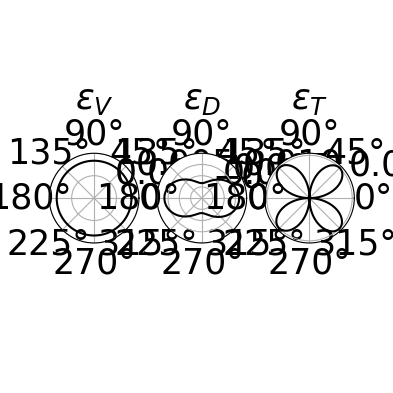

In [17]:
%matplotlib widget
cm = 1 / 2.54  # centimeters in inches
if split==True :
    plt.figure(figsize=(0*cm, 10*cm))
    rads = np.arange(0, (2 * np.pi), (2 * np.pi) / n_mp)
    plt.subplot(131, projection='polar')#subplot like matlab sets a matrix of plots but without setting ann array just the xyp where p position 
    #plt.subplot(131 , projection='polar')
    plt.plot(rads, e_V[-1, :], 'k')
    plt.ylim(-1.5 * np.max(np.abs(e_V)),
                    1.5 * np.max(np.abs(e_V)))
    plt.title(r'$ε_V$', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=25)

    plt.subplot(132, projection='polar')
    plt.plot(rads, e_D[-1, :], 'k')
    plt.ylim(-1.5 * np.max(np.abs(e_D)),
                    1.5 * np.max(np.abs(e_D)))
    plt.title(r'$\varepsilon_D$', fontsize=25)

    plt.tick_params(axis='both', which='major', labelsize=25)
    plt.subplot(133, projection='polar')
    plt.plot(rads, np.linalg.norm(e_T_r[-1, :],axis=-1), 'k')
    plt.title(r'$ε_T$', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=25)
else :
    plt.figure(figsize=(20*cm, 10*cm))
    rads = np.arange(0, (2 * np.pi), (2 * np.pi) / n_mp)
    plt.subplot(121, projection='polar')#subplot like matlab sets a matrix of plots but without setting ann array just the xyp where p position 
    plt.plot(rads, e_N[-1, :], 'k')
    plt.ylim(-1.5 * np.max(np.abs(e_N)),
                    1.5 * np.max(np.abs(e_N)))
    plt.title(r'$ε_N$', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=25)

    plt.subplot(122, projection='polar')
    plt.plot(rads, np.linalg.norm(e_T_r[-1, :],axis=-1), 'k')
    plt.title(r'$ε_T$', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()


In [12]:
#ELASTICITY CALCS
E_modulus =44800
n_poisson = 0.18
#issuewith if does not exit properly
if n_poisson >=-1 and n_poisson<0.25 : 
    K=E_modulus/(2*(1+n_poisson))
    G=E_modulus/(3*(1-2*n_poisson))
else:
    K_1=K
    K=E_modulus/(2*(1+n_poisson))
    G_1=0
    K_11 =K+K_1
    G_11 =G+G_1
    n_pseudopoisson=(3*K*(1+G/G_1)-2*G)/(6*K_*(1+G/G_1)+2*G)
    n_poisson=n_pseudopoisson
E_N = E_modulus/(1-2*n_poisson)
E_T = E_N*((1-4*n_poisson)/(1+n_poisson))
E_V= E_modulus/(1-2*n_poisson)
xo=1#for double constraint
E_D=5*E_modulus/((16+n_poisson)*(2+3*n_poisson))
E_N = K/3
from IPython.display import Latex

In [14]:
s_N = E_N * e_N
if split==True:
    s_V = E_V * e_V
    s_D = E_D * e_D
s_T_r = E_T * e_T_r

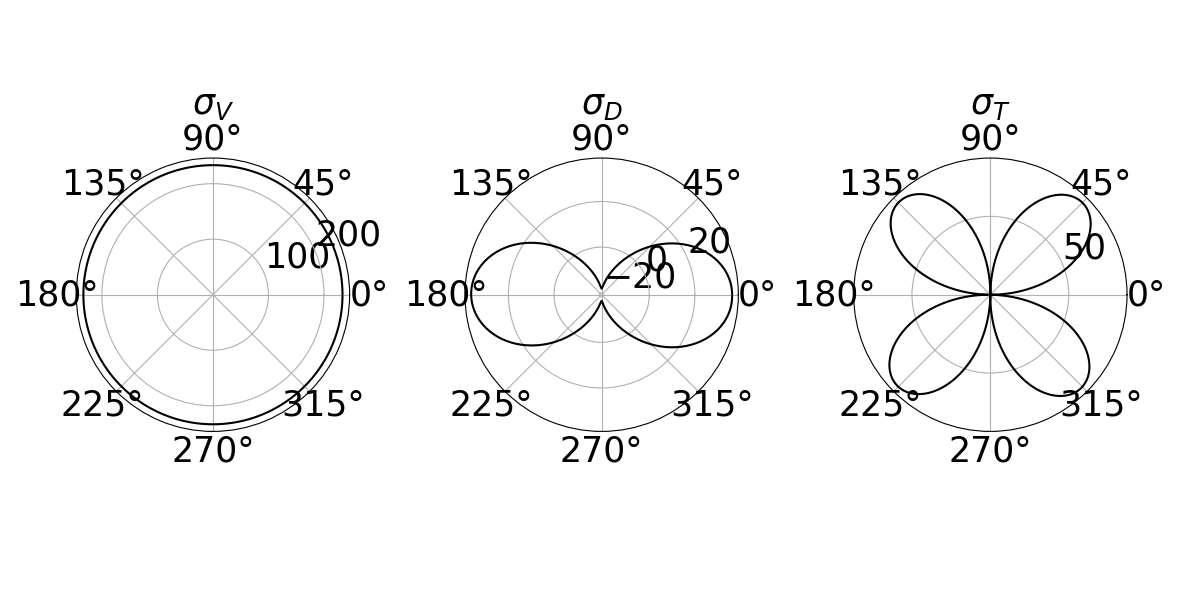

In [16]:
%matplotlib widget
cm = 1 / 2.54  # centimeters in inches
microplane = 45 #46°
if split==True :
    plt.figure(figsize=(30*cm, 15*cm))
    rads = np.arange(0, (2 * np.pi), (2 * np.pi) / n_mp)
    plt.subplot(131, projection='polar')
    plt.plot(rads, s_V[-1, :], 'k')
    plt.title(r'$\sigma_V$', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=25)

    plt.subplot(132, projection='polar')
    plt.plot(rads, s_D_predictor[-1, :], 'r')
    plt.plot(rads, s_D[-1, :], 'k')
    plt.title(r'$\sigma_D$', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=25)

    plt.subplot(133, projection='polar')
    plt.plot(rads, np.linalg.norm(s_T_r[-1, :],axis=-1), 'k')
    plt.title(r'$\sigma_T$', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=25)
else :
    plt.figure(figsize=(30*cm, 15*cm))
    rads = np.arange(0, (2 * np.pi), (2 * np.pi) / n_mp)
    plt.subplot(121, projection='polar')
    plt.plot(rads, s_N[-1, :], 'k')
    plt.title(r'$\sigma_N$', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=25)

    plt.subplot(122, projection='polar')
    plt.plot(rads, np.linalg.norm(s_T_r[-1, :],axis=-1), 'k')
    plt.title(r'$\sigma_T$', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()

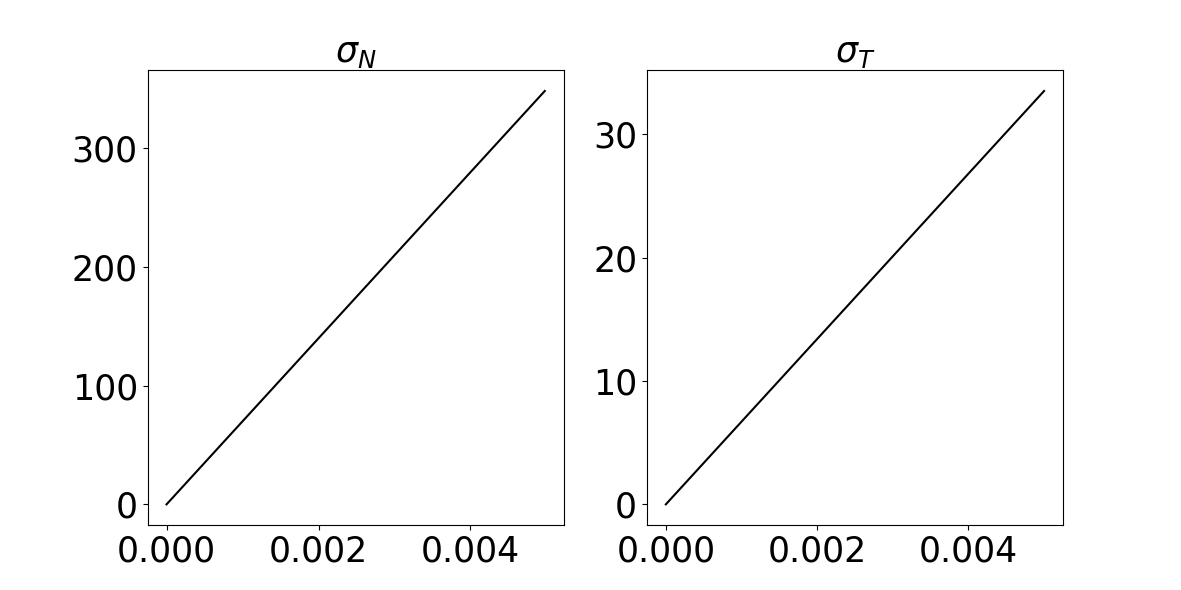

In [20]:
if split==True:
        sigma_ij= (     np.einsum('i,ij',s_V,delta)+np.einsum('d,...d,na,nb->...ab',
                                  IntegScheme.MPW, s_D, IntegScheme.MPN, IntegScheme.MPN) +
                        0.5 * (
                                np.einsum('n,...nf,na,fb->...ab',
                                          IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta) +
                                np.einsum('n,...nf,nb,fa->...ab',
                                          IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta)
                        )
                )
else :        
        sigma_ij = (
                        np.einsum('n,...n,na,nb->...ab',
                                  IntegScheme.MPW, s_N, IntegScheme.MPN, IntegScheme.MPN) +
                        0.5 * (
                                np.einsum('n,...nf,na,fb->...ab',
                                          IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta) +
                                np.einsum('n,...nf,nb,fa->...ab',
                                          IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta)
                        )
                )

 

ValueError: operand has more dimensions than subscripts given in einstein sum, but no '...' ellipsis provided to broadcast the extra dimensions.

In [ ]:
#ALG0
zita=0
split=True
n_dim = 2 #number of dims in domain 
n_mp = 360 #number of microplanes in interpolation 
n_steps = 1000 #solver steps 
#ratio=step of defining actual domain
delta = np.identity(n_dim) #Kronecker δij
epsilon_11=np.linspace(0,0.01,n_steps)#define evenly the lin space from 0 to 0.01 with n_steps is the n in  nijk
#0.01 optional or otherwise raises DeprecationWarning when num cannot be safely interpreted as an integer
epsilon_ij=np.zeros((len(epsilon_11,),n_dim,n_dim))#creation of the finite 2d space
#question one-> since we use the ntr transormation and the space is also 2d there is no need for 3d?
#epsilon_ijk=np.zeros((len(epsilon_11,),n_dim,n_dim,n_dim))
epsilon_ij[:,0,0]=epsilon_11 #reshape,arrange,apprehend 
#epsilon_ij[:,0,0,0]=epsilon_11 for 3d
epsilon_ijcalc=epsilon_ij[0,:,:]#slicing for the calculations in the loops 
class IntegScheme():
    #n_mp=360
    alpha_list = np.linspace(0,2*np.pi,n_mp)#polar angle dom
    a_length=alpha_list.size 
    MPN = np.array([[np.cos(alpha),np.sin(alpha)] for alpha in alpha_list ])
    #alpha=float val?
    #weights of each microplane
    if n_dim==2:
        MPW = np.ones(n_mp) / n_mp * 2 
    elif n_dim==3:
        MPW = np.ones(n_mp) / n_mp * 6
    else: 
        print("ENTER NUMBER OF DIMS")
    MPM = np.zeros_like(MPN)
    delta= np.identity(n_dim) #should be already set?
    MPNN_nij = np.einsum('ni,nj -> nij', MPN,MPN)
    MPTT_nijr = 0.5*(np.einsum('ni,jr -> nijr',MPN,delta)
                    +np.einsum('nj,ir ->njir',MPN,delta)
                    -2*np.einsum('ni,nj,nr ->nijr',MPN,MPN,MPN))
    NPM=np.zeros_like(MPN)
    #attempt to create MPTM and MPTL instead ij sumbfor card coords
    lengthm=0.0
    #while lengthm==0 :# DO WHILE (lengthm .lt. epsilon(lengthm)
    ##calcdummy=MPN.shape
    #    randomvec=np.ones((a_length,n_dim))#since its just for the 3d ?
   #     MPTM_nijm=randomvec-np.einsum('niMPN,randomvec)*MPN
   #     lengthm=np.sqrt(MPTM_nij,MPTM_nij)
   # MPTM_nij=MPTM_nijm/lengthm
   # MPTL_ij=np.cross(MPTM_nij,MPNN_nij)
    #MPTM= np.einsum('nij,)
    #MPTL=MPNN_nij-MPNV
s_N = E_N * e_N
s_V = E_V * e_V
s_D = E_D * e_D
s_T_r = E_T * e_T_r
k_1=150*10**-6
k_2=110000
k_3=30
k_4=100
k_5=10**-4
f_c0dot=20  #MPa
f_cdot=20   #Mpa 
fc0= 15.08         #MPa Reference compressive strength
c_1= 8.9*10**-2    # Controls the uniaxial tensile strength
c_2= 17.6*10**-2   # Controls the roundness of the peak in uniaxial tension
c_3= 4             # Controls the slope of the postpeak in uniaxial tension
c_4= 50            # Controls the slope of the postpeak tail in uniaxial compression
c_5= 3500          # Controls the volumetric expansion under compression
c_6= 20            # Controls the roundness of the peak in volumetric expansion under compression
c_7= 1             # Controls the slope of the initial postpeak in uniaxial compression
c_8= 8             # Controls the peak strength in uniaxial compression
c_9= 1.2*10**-2    # Controls the peak roundness in uniaxial compression
c_10= 0.33         # Controls the effective friction coefficient
c_11= 0.5          # Initial cohesion in frictional response
c_12= 2.36         # Controls the change of cohesion with tensile volumetric strains
c_13= 4500         # Controls the unloading slope in tension
c_14= 300          # Controls the unloading slope at low hydrostatic compression
c_15= 4000         # Controls the transition from unloading slope at high confinement to that at low confinement
c_16= 60           # Controls the unloading slope at high hydrostatic compression
c_17= 1.4          # Controls the tensile strength
c_18= 1.6*10**-3   # Controls the tensile cracking under compression
c_19= 1000         # Controls the tensile softening rate induced by compression
c_20= 1.8          # Controls the volumetric-deviatoric coupling at high pressures
c_21=250
E_D0=E_D
gama_0=f_c0dot/E_D0+f_cdot/E_D
e_0Nplus=np.zeros(n_mp)
e_0Nminus=np.zeros(n_mp)
#loop over each time step
for j in range(n_steps): 
    #loop over each microplane
    for i in range(n_mp):
        epsilon_I = np.linalg.eig(epsilon_ij[j-1])[0,0]
        epsilon_II = np.linalg.eig(epsilon_ij[j-1])[1,0]
        if j>0:
            
            e_elastic=-s_V[-1,i]/E_N[-1,i]
         
    # predictor for compressive deviatoric stress
    s_D[j][i] = E_D * e_D[j][i]
    # obtaining deviatoric compressive strain boundary (threshold)
    gama_1=np.exp(gama_0)*np.tanh(c_9*(-e_V[j][i])/k_1)
    bita_2=c_5*gama_1+c_7
    bita_3=c_6*gama_1+c_8
    s_D_bound=E_D*k_1*bita_3/(1+6*((-e_D[j][i])/k_1*bita_2)**2)
    # checking if we are crossing the boundary for time step j and microplane i
    if e_N[j][i] < 0:
        # print("comp.")
        # if we cross boundary, correct microplane i stress
        if s_D[j][i] < s_D_bound:
            # corrector deviatoric stress
            s_D[j][i] = s_D_bound
    # further boundary
    # are we in tension?
    if e_N[j][i] > 0:
        if e_N[j][i] > e_0Nplus[i]:
            e_0Nplus[i] = e_N[j][i]            
    # are we in compression?    
    if e_N[j][i] < 0: 
        if e_N[j][i] < e_0Nminus[i]:
            e_0Nminus[i] = e_N[j][i]
    ##########################################################
    1
    ##########################################################
    de_v=np.einsum('ij,ij',de_ij)/n_dim
    de_ij= np.eye(epsilon_11,n_dim)#for sure wrong just to continue with the script 
    de_n=np.einsum('nij,ij,->n',IntegScheme.MPNN_nij,de_ij)
    de_tr=np.einsum('nija,...ij->...na',MPTT_ijr,de_ij)
    de_m=
    de_l=
    ###########################################################
    2
    ###########################################################
    
    de_v=np.einsum('ij,ij',de_ij)/n_dim
    e_V=e_V+de_v
    e_elastic=(s_V/E_N)
    #principal stresses class!2 and 3d just from a mech book
    s=
    ###########################################################
    3
    ###########################################################
    a=(k_5/(1+min(-s_V,c_21)/E_N))*((epsilon_I-epsilon_II)/k_1)**(c_20)+k_4
    s_V_bound=-E_V*k_1*k_3*np.exp(-e_V/(k_1*a))
    ###########################################################
    4
    ###########################################################
    de_d=de_n-de_v
    e_D0=e_N-e_V0
    e_D=e_D0+de_d
    gama_1=np.exp(gama_0)*np.tanh*(c_9*(-e_V)/k_1)
    bita_1=-c_1+c_17*np.exp(-c_19*(-s_V0-c_18)/E_N0)
    bita_2=c_5*gama_1+c_7
    bita_3=c_6*gama_1+c_8
    s_D_bound=E_D*k_1*bita_3/(1+6((-e_D)/k_1*bita_2)**2)
    ###########################################################
    e_N[i,j]=e_D+e_V
    s_N = E_N * e_N
    s_V = E_V * e_V
    s_D = E_D * e_D
    s_T_r = E_T * e_T_r
    e_0Nplus=np.abs(np.max(e_N))
    e_0Nminus=np.abs(np.min(e_N))
    E_N0=e/(1-2*n_poisson)
    if s_N0>=0:      #np.zero_like(s_N)
        E_N=E_N0*np.exp(-c_13*e_0Nplus)*(1-0.1*zita**2)**-1
    elif s_N0>E_N0*e_N and s_N0*de_n<0:
        E_N=E_N0
    else :
        E_N=E_N0*(np.exp(-c_14*np.abs(e_0Nminus)/(1+c_15*e_elastic))+
           c_16*e_elastic)
    s_N_el=s_N0+E_N*de_n
    #############################################################
    if s_N_bound>0:
        s_N_bound=E_modulus*k_1*bita_1*np.exp(-(e_N-bita_1*c_2*k_1)/(-c_4*e_elastic+k_1*c_3))
    #############################################################
    s_N=np.max(np.min(s_N_elastic,s_N_bound),s_V_bound+s_D_bound)
    if s_N>=s_N_bound:
        e_0Nplus[i]=np.abs(np.maximum(e_N))
        e_0Nminus[i]=np.abs(np.minimum(e_N))
    
    
    
    
    
    s_V0=s_V[j,i]
    s_T_r=s_T_r[j,i]
    if n_dim==3
        s_L=s_L[j,i]
        s_M=s_M[j,i]
    E_N0=E_N[j,i]
    E_V0=E_V[j,i]
    E_D0=E_D[j,i]
    E_T = E_N*((1-4*n_poisson)/(1+n_poisson))
    E_T0=E_T[j,i]
    s_N0=E_T*k_1*c_11-c_12*e_V#shouldnt it be inside the microplane loop 
    if s_N=<0:
      s_T_bound=(c_10*(s_N0-s_N)**(-1)+(E_T*k_1-k_2)**(-1))**(-1)
    else:
      s_T_r_bound=(c_10*s_N0**(-1)+(E_T*k_1-k_2)**(-1))**(-1)
    s_T_r_elastic=((s_T_r +E_T*de_tr)**2)**-1
    s_T_r=np.minimum(s_T_r_bound,np.abs(s_T_r_elastic))


s_V[j,:]=np.einsum('...i,i',s_N,IntegScheme.MPW)

if split==True:
        sigma_ij= (     np.einsum('i,ij',s_V,delta)+np.einsum('d,...d,na,nb->...ab',
                                  IntegScheme.MPW, s_D, IntegScheme.MPN, IntegScheme.MPN) +
                        0.5 * (
                                np.einsum('n,...nf,na,fb->...ab',
                                          IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta) +
                                np.einsum('n,...nf,nb,fa->...ab',
                                          IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta)
                        )
                )
else :        
        sigma_ij = (
                        np.einsum('n,...n,na,nb->...ab',
                                  IntegScheme.MPW, s_N, IntegScheme.MPN, IntegScheme.MPN) +
                        0.5 * (
                                np.einsum('n,...nf,na,fb->...ab',
                                          IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta) +
                                np.einsum('n,...nf,nb,fa->...ab',
                                          IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta)
                        )
                )

            




